# 라이브러리 불러오기 및 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [36]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [37]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [38]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2
            "Dress",        # index 3
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6
            "Sneaker",      # index 7
            "Bag",          # index 8
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 9338
다음 그림은 Coat 입니다.


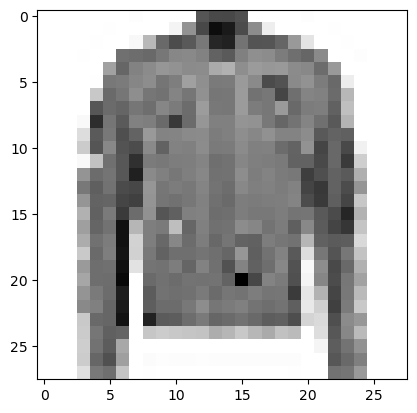

In [39]:
id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

# 데이터 처리

## X값 min max 스케일링

In [40]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [41]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [42]:
train_x.max(), train_x.min()

(1.0, 0.0)

## X 차원 reshape

In [43]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
_, h, w = train_x.shape

print(h, w)

28 28


In [45]:
train_x = train_x.reshape(train_x.shape[0],h,w,1)
test_x = test_x.reshape(test_x.shape[0],h,w,1)


train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Y 원핫인코딩

In [46]:
from tensorflow.keras.utils import to_categorical

class_n = len(np.unique(train_y))
class_n

In [48]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

train_y.shape, test_y.shape

((60000, 10), (10000, 10))

# 모델링

In [49]:
from tensorflow.keras.backend import clear_session

In [52]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 생성
il = tf.keras.Input(shape=[28,28,1])

hl = tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           activation='relu')(il)
hl = tf.keras.layers.BatchNormalization()(hl)
hl = tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           activation='relu')(hl)
hl = tf.keras.layers.BatchNormalization()(hl)
hl = tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              strides=(2,2)
                              )(hl)
hl = tf.keras.layers.Dropout(0.25)(hl)
hl = tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           activation='relu')(il)
hl = tf.keras.layers.BatchNormalization()(hl)
hl = tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           activation='relu')(hl)
hl = tf.keras.layers.BatchNormalization()(hl)
hl = tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              strides=(2,2)
                              )(hl)
hl = tf.keras.layers.Flatten()(hl)
hl = tf.keras.layers.BatchNormalization()(hl)

ol = tf.keras.layers.Dense(10, activation='softmax')(hl)

model = tf.keras.Model(il,ol)
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy, 
              metrics='accuracy')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0     

### Earlystopping 설정

In [54]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=5,
                                       verbose=1,
                                       restore_best_weights=True)

### 데이터 학습하기

In [55]:
# 데이터를 넣어서 학습시키자!
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=5, verbose=1,
                 callbacks=[es])

Epoch 1/5
1500/1500 [==============================] - 154s 101ms/step - loss: 0.9094 - accuracy: 0.8324 - val_loss: 0.8653 - val_accuracy: 0.8294
Epoch 2/5
1500/1500 [==============================] - 148s 99ms/step - loss: 0.5974 - accuracy: 0.8709 - val_loss: 0.6240 - val_accuracy: 0.8622
Epoch 3/5
1500/1500 [==============================] - 158s 106ms/step - loss: 0.4593 - accuracy: 0.8858 - val_loss: 0.7082 - val_accuracy: 0.8516
Epoch 4/5
1500/1500 [==============================] - 162s 108ms/step - loss: 0.3541 - accuracy: 0.8969 - val_loss: 0.6529 - val_accuracy: 0.8497
Epoch 5/5
1500/1500 [==============================] - 159s 106ms/step - loss: 0.3013 - accuracy: 0.9067 - val_loss: 0.7069 - val_accuracy: 0.8533


### 데이터 예측하기

In [56]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 [==============================] - 9s 28ms/step


(10000, 10)

In [57]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [58]:
single_y_pred[:3]

array([9, 2, 1], dtype=int64)

In [59]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [60]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 85.34%


id = 3739
다음 그림은 숫자 3 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [90.  4.  0.  4.  0.  0.  0.  0.  0.  0.]
틀렸어요


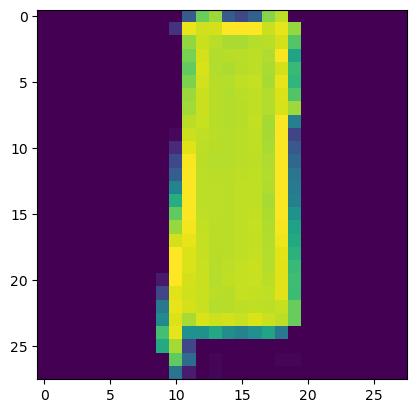

In [65]:
# 틀린 데이터 보기
true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 7187
다음 그림은 숫자 1 입니다.
모델의 예측 : 1
모델의 카테고리별 확률 : [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]
정답입니다


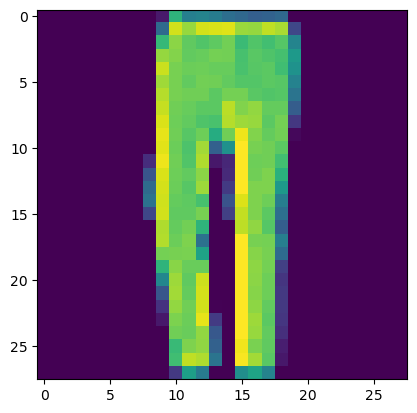

In [62]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

# 학습정도 시각화


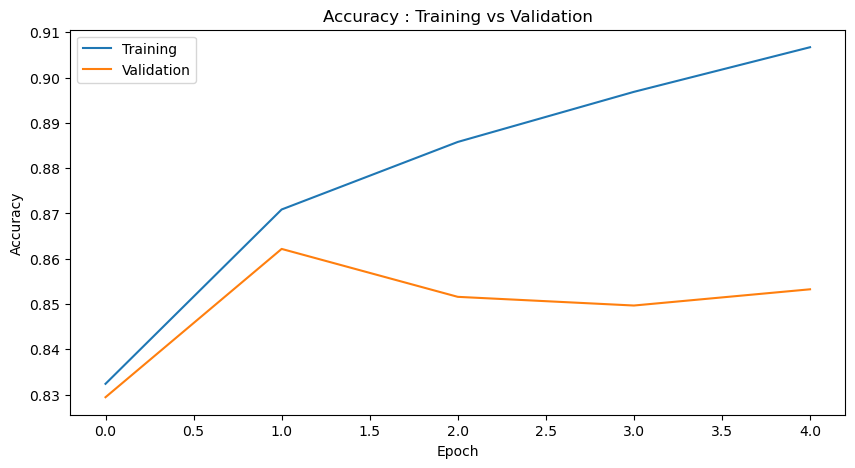

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

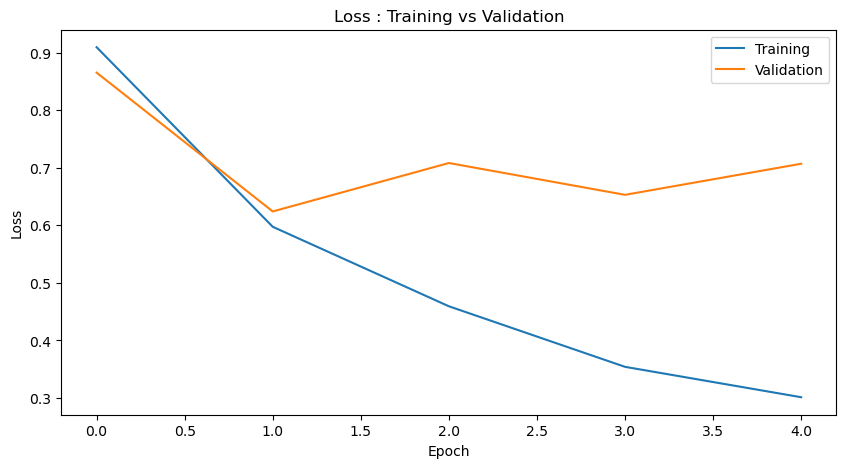

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()